# Summary Statistics in Plink 

## Background: 
The population data have already been filtered once in R based on MAF per population and global locus genotype rate, though they have not been filtered on anything else.  Those filters in R produced a whitelist that was used in Stacks to get a second set of genepop and vcf files, which are the data used here.  

This notebook is basically a copy of one written by Ryan Waples:
http://nbviewer.ipython.org/github/rwaples/chum_populations/blob/master/plot_pop_genotypes.ipynb (thanks!)

###1. Set the working directory. 
    This folder has a copy of the program Plink V.1.9, as well as the converted .ped and .map files. 

In [36]:
cd Z:\WORK\TARPEY\Exp_Pink_Pops\FilteringGenotypes\PLINK\Summary_Stats

Z:\WORK\TARPEY\Exp_Pink_Pops\FilteringGenotypes\PLINK\Summary_Stats


### 2. Generate summary statistics in Plink 

!plink --file "batch_4.plink" --family --missing --freq --het small-sample --ibc --fst --allow-extra-chr --allow-no-sex --write-snplist --make-bed --out batch_4_out

### Plot Summary statistics 


In [ ]:
#!pip install seaborn
#!python -m pip install --upgrade pip

In [37]:
import numpy as np
import pandas as pd
import scipy
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

## Population Information

In [59]:
POPINFO = pd.read_csv('POPINFO.txt', sep ="\t")
POPINFO.index += 1
POPINFO.head(19)

,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT
1,4,11,1,pop_1,PAMUR10,AMUR10,2010,Even,Asia
2,16,17,10,pop_10,PLAKEL06,LAKEL06,2006,Even,North America
3,15,8,11,pop_11,PLAKEL07,LAKEL07,2007,Odd,North America
4,9,5,12,pop_12,PNOME91,NOME91,1991,Odd,North America
5,10,14,13,pop_13,PNOME94,NOME94,1994,Even,North America
6,17,9,14,pop_14,PSNOH03,SNOH03,2003,Odd,North America
7,18,18,15,pop_15,PSNOH96,SNOH96,1996,Even,North America
8,12,15,16,pop_16,PSPINK14,SUSIT14,2014,Even,North America
9,5,3,17,pop_17,PTAUY09,TAUY09,2009,Odd,Asia
10,6,12,18,pop_18,PTAUY12,TAUY12,2012,Even,Asia


### Missingness per population

In [119]:
imiss = pd.read_csv('batch_4_out.imiss', sep = " ", skipinitialspace = True, index_col = False)
print(len(imiss))
imiss.head()

492


,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS
0,1,PAMUR10_0001,Y,2057,63758,0.03226
1,1,PAMUR10_0002,Y,1729,63758,0.02712
2,1,PAMUR10_0003,Y,1915,63758,0.03004
3,1,PAMUR10_0004,Y,1548,63758,0.02428
4,1,PAMUR10_0005_comb,Y,4534,63758,0.07111


In [120]:
imiss.dtypes

FID             int64
IID            object
MISS_PHENO     object
N_MISS          int64
N_GENO          int64
F_MISS        float64
dtype: object

In [121]:
POPINFO.head()
POPINFO.dtypes

Order_geo     int64
Order_lin     int64
CLUSTER       int64
POP          object
SILLI        object
POPNAME      object
YEAR          int64
LINEAGE      object
CONTINENT    object
dtype: object

In [122]:
imiss = pd.merge(imiss, POPINFO, left_on = 'FID', right_on = 'CLUSTER')
imiss = imiss.sort(columns = 'Order_geo')

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [123]:
print(len(imiss))
imiss.head()
#imiss.dtypes

492


,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT
245,9,PKUSHI07_0014,Y,2728,63758,0.04279,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
232,9,PKUSHI07_0001_comb,Y,1673,63758,0.02624,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
234,9,PKUSHI07_0003_comb,Y,2108,63758,0.03306,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
235,9,PKUSHI07_0004,Y,2603,63758,0.04083,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
236,9,PKUSHI07_0005_comb,Y,1732,63758,0.02717,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia


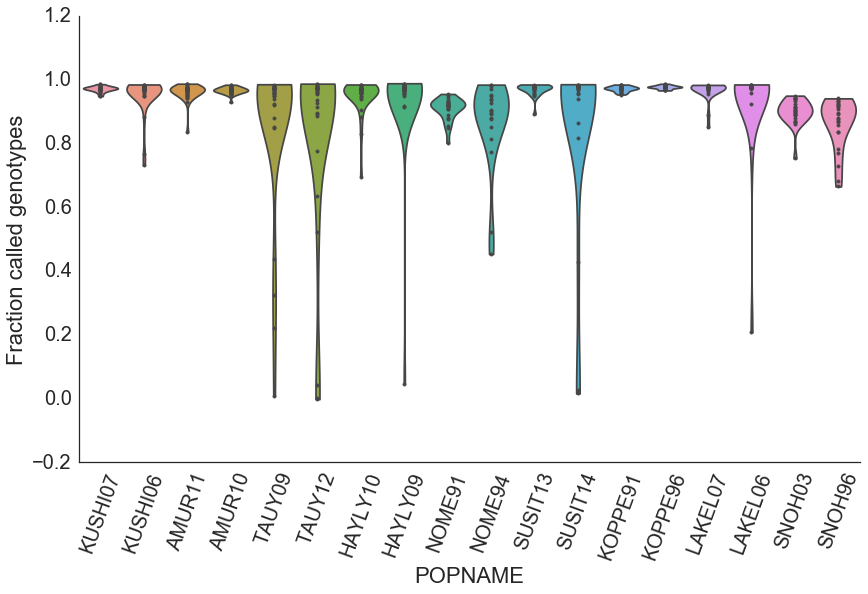

In [124]:
figsize(14, 8)
sns.violinplot(x = imiss['POPNAME'], y = (1-imiss['F_MISS']), bw = .5, cut =.01, scale = "width", width = .8, inner = "points", inner_kws = {"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.ylabel('Fraction called genotypes')
sns.despine()
plt.show()

### Number of missing genotypes per locus

In [125]:
lmiss = pd.read_csv('batch_4_out.lmiss', sep = " ", skipinitialspace = True,index_col = False)
lmiss_means = lmiss.groupby(['SNP']).mean()
lmiss_sums = lmiss.groupby(['SNP']).sum()
print(len(lmiss))

1147644


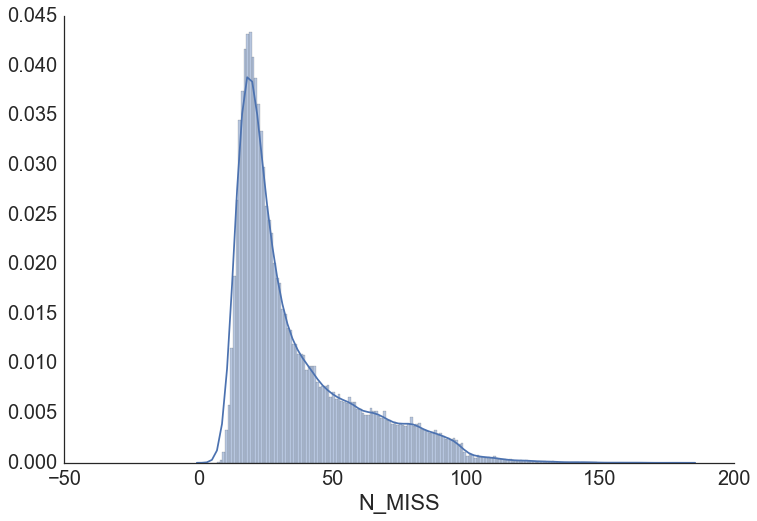

In [126]:
figsize(12,8)
sns.distplot(lmiss_sums['N_MISS'], bins = range(150))
sns.despine()
plt.show()

### Fraction missing per locus
distribution of per locus missingness, mean of population missingness

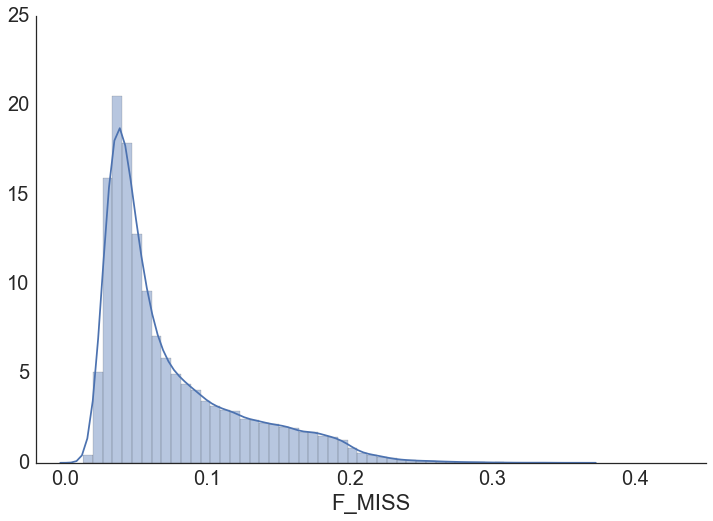

In [127]:
figsize(12,8)
sns.distplot(lmiss_means['F_MISS'])
sns.despine()
plt.xlim(-.02, .45)
plt.show()

### Minor Allele Frequency: MAF 

In [69]:
frq = pd.read_csv('batch_4_out.frq.strat', 
                  sep = " ", skipinitialspace = True, index_col = False)
frq.head()

,CHR,SNP,CLST,A1,A2,MAF,MAC,NCHROBS
0,un,2_29,1,A,C,0.21880,14,64
1,un,2_29,2,A,C,0.03333,2,60
2,un,2_29,3,A,C,0.45830,22,48
3,un,2_29,4,A,C,0.03333,2,60
4,un,2_29,5,A,C,0.11670,7,60


In [129]:
#frq['CLUSTER'] = [int(xx.split('_')[1]) for xx in frq['CLST']]
frq_group_mean = frq.groupby('SNP').mean()

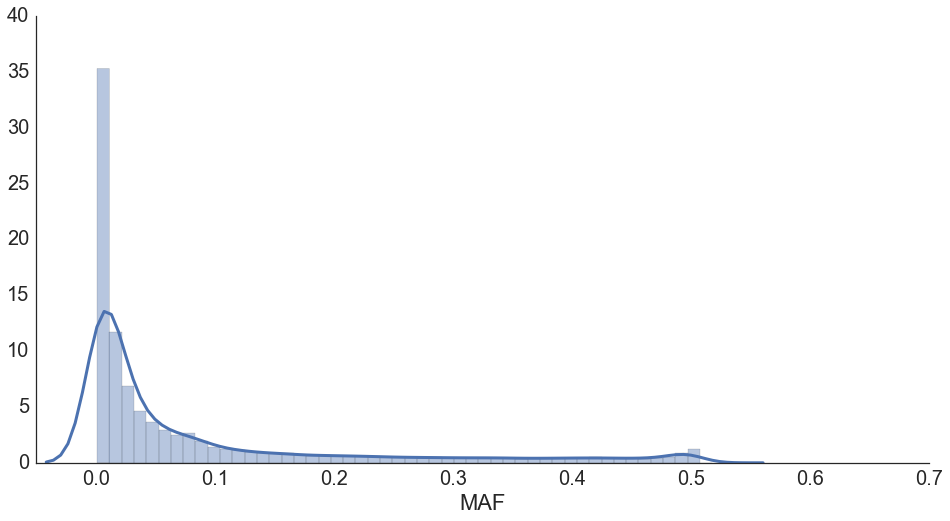

In [130]:
figsize(16, 8)
sns.distplot(frq_group_mean['MAF'], kde_kws = {"lw": 3})
plt.xlim(-.05, .7)
sns.despine()
plt.show()

### MAF by population

In [131]:
frq = pd.merge(frq, POPINFO, left_on = 'CLST', right_on='CLUSTER')
frq = frq.sort(columns = 'Order_geo')
frq.head()

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,CHR,SNP,CLST,A1,A2,MAF,MAC,NCHROBS,Order_geo_x,Order_lin_x,...,CONTINENT_y,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT
573821,un,104463_62,9,G,A,0.0000,0,46,1,1,...,Asia,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
531323,un,26028_73,9,A,C,0.0000,0,64,1,1,...,Asia,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
531322,un,26028_67,9,G,A,0.0000,0,64,1,1,...,Asia,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
531321,un,26028_66,9,T,G,0.6094,39,64,1,1,...,Asia,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
531320,un,26025_35,9,A,G,0.3710,23,62,1,1,...,Asia,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia


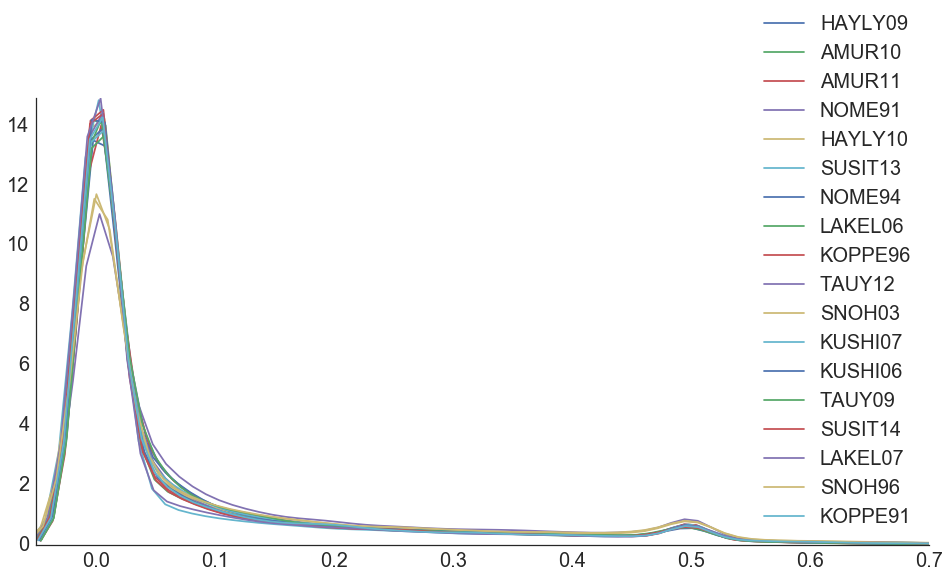

In [132]:
# these MAF are per-population, so can (locally) go above 0.5
figsize(16, 8)

for xx in set(frq['POPNAME']):
    sns.kdeplot(frq['MAF'][frq['POPNAME'] == xx], label = xx)
plt.xlim(-.05, .7)
sns.despine()
plt.show()

### FST

In [168]:
fst = pd.read_csv('batch_4_out.fst', sep= "\t")
fst_sort = fst.sort_values(by=['FST'])
fst_sort['RANK'] = fst_sort['FST'].rank(ascending=1)
fst_sort.head()

,CHR,SNP,POS,NMISS,FST,RANK
19050,un,23263_81,866950,384,-0.015154,1.0
44678,un,57197_8,2066411,469,-0.014897,2.0
19051,un,23263_83,866952,404,-0.014848,3.0
828,un,1071_63,38040,394,-0.014144,4.0
57841,un,77156_21,2689644,389,-0.013709,5.0


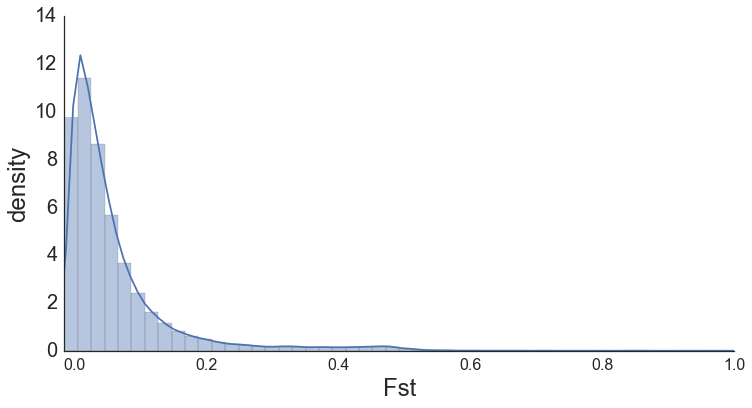

In [144]:
figsize(12, 6)

sns.distplot(fst['FST'], bins = 50)
plt.xlabel('Fst',fontsize = 24); plt.ylabel("density",fontsize = 24)
plt.xticks(fontsize = 16)
plt.xlim(min(fst['FST']), max(fst['FST']))
sns.despine()
plt.show()

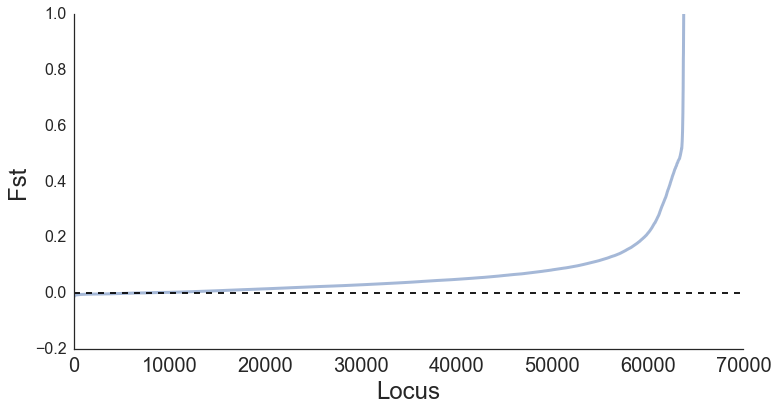

In [180]:
figsize(12, 6)
plt.plot(fst_sort['RANK'],fst_sort['FST'], lw= 3, alpha = .5)
plt.axhline(c='black', ls = '--')
plt.xlabel('Locus',fontsize = 24); plt.ylabel("Fst",fontsize = 24)
plt.yticks(fontsize = 16)
sns.despine()
plt.show()


### Heterozygosity 

In [133]:
from __future__ import division
het = pd.read_csv('batch_4_out.het', sep= " ", skipinitialspace = True)
#het['CLUSTER'] = [int(xx.split('_')[1]) for xx in imiss['FID']]
het = pd.merge(het, POPINFO, left_on = 'FID', right_on = 'CLUSTER')
het = het.sort(columns = 'Order_geo')
het['O_het'] = 1-(het['O(HOM)']/het['N(NM)'])
het.head()

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,FID,IID,O(HOM),E(HOM),N(NM),F,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT,O_het
245,9,PKUSHI07_0014,53563,53760.0,61030,-0.02717,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.122350
232,9,PKUSHI07_0001_comb,54441,54700.0,62085,-0.03443,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.123122
234,9,PKUSHI07_0003_comb,54217,54310.0,61650,-0.01263,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.120568
235,9,PKUSHI07_0004,54005,53900.0,61155,0.01479,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.116916
236,9,PKUSHI07_0005_comb,54321,54620.0,62026,-0.04106,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.124222


### Heterozygosity per population

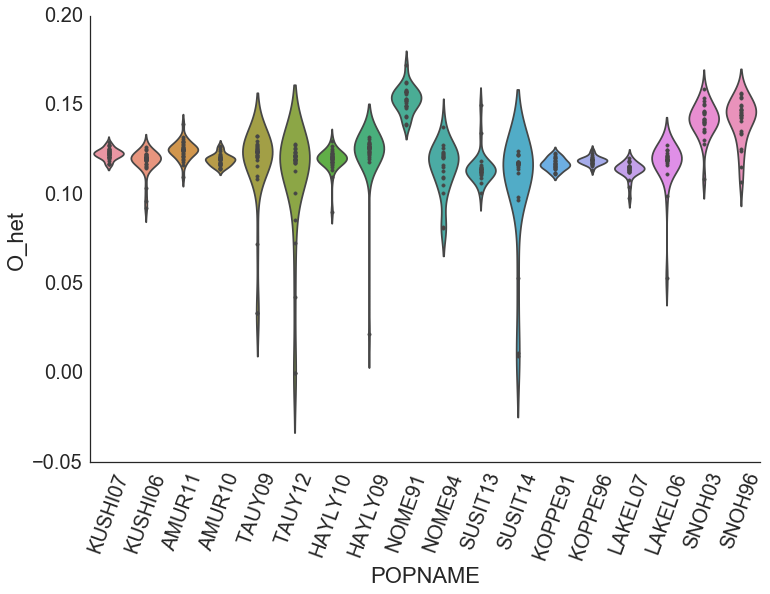

In [134]:
figsize(12, 8)
sns.violinplot(x = het['POPNAME'], y = het['O_het'],
            width= .8, scale = "width", inner="points", inner_kws={"ms": 16})

locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

### Heterozygosity by lineage

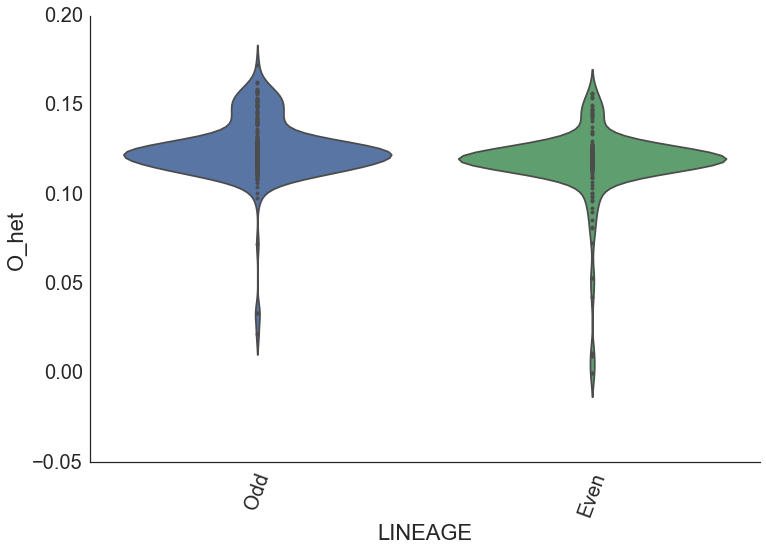

In [135]:
figsize(12, 8)
sns.violinplot(x = het['LINEAGE'], y = het['O_het'], width= .8, scale = "width", inner="points", inner_kws={"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

### Heterozygosity by continent

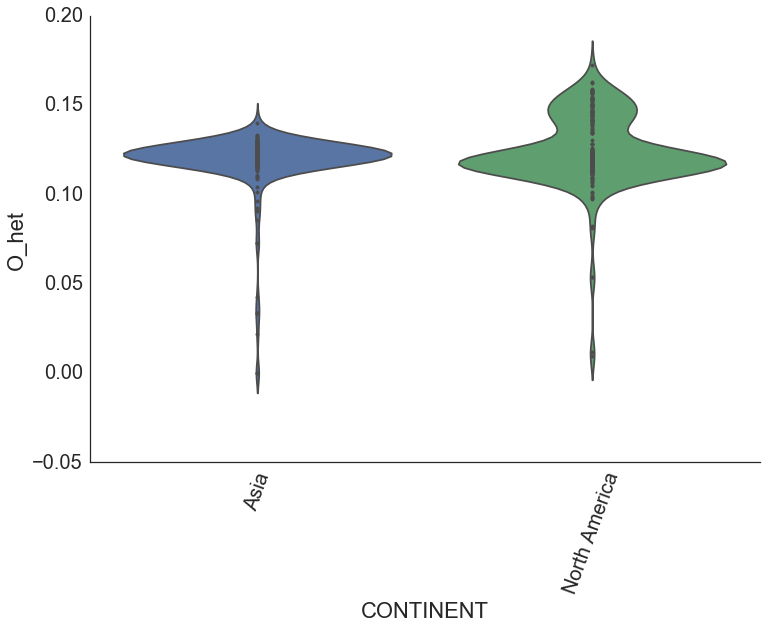

In [136]:
figsize(12, 8)
sns.violinplot(x = het['CONTINENT'], y = het['O_het'],
                width= .8, scale = "width", inner="points", inner_kws={"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

### Inbreeding

PLINK calculates three inbreeding coefficients for each sample:

* Fhat1 is the usual variance-standardized relationship minus 1
* Fhat2 is computed from the expected autosomal homozygous genotype counts for each sample. Method-of-moments F coefficient estimates (i.e. ([observed hom. count] - [expected count]) / ([total observations] - [expected count])) 
* Fhat3 is based on the correlation between uniting gametes

In [94]:
ibc = pd.read_csv('batch_4_out.ibc', sep= "\t")

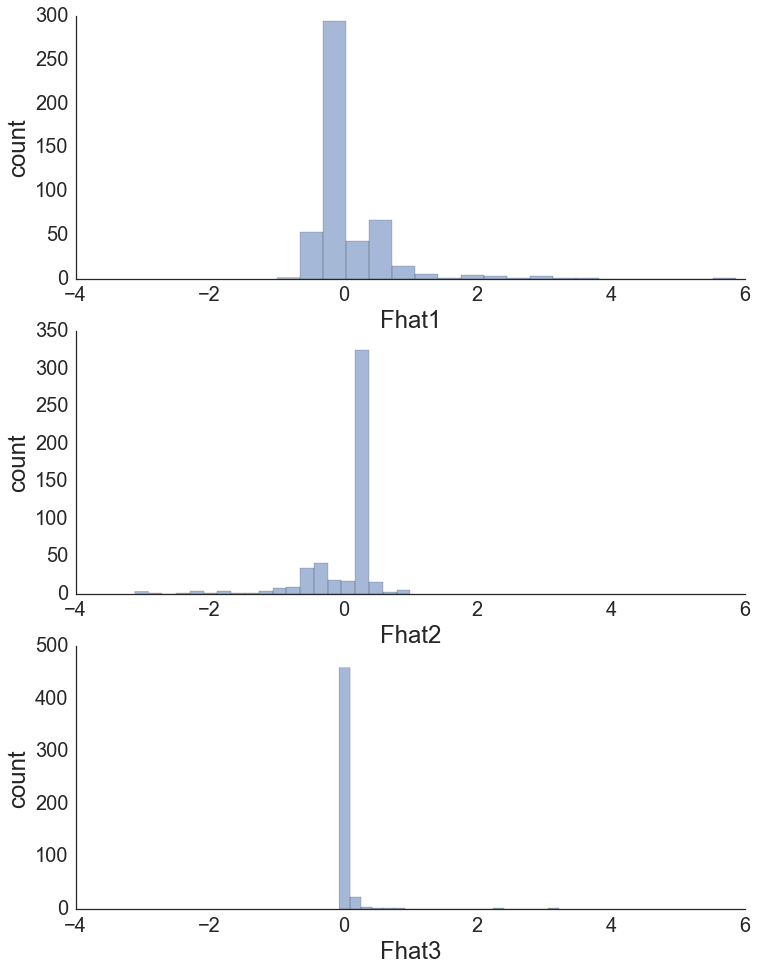

In [95]:
figsize(12, 16)
ax1 = plt.subplot(311)
plt.hist(ibc['Fhat1'] , bins = 20, alpha =.5)
plt.xlim(-.45, .7)
plt.xlabel('Fhat1',fontsize = 24); plt.ylabel("count",fontsize = 24)

plt.subplot(312,sharex=ax1)
plt.hist(ibc['Fhat2'] , bins = 20, alpha =.5)
plt.xlabel('Fhat2',fontsize = 24); plt.ylabel("count",fontsize = 24)
plt.subplot(313, sharex=ax1)
plt.hist(ibc['Fhat3'] , bins = 20, alpha =.5)
plt.xlabel('Fhat3',fontsize = 24); plt.ylabel("count",fontsize = 24)
sns.despine()
plt.show()

### Are inbreeding coefficients related to missingness? 

In [96]:
x = 1-(ibc['NOMISS']/max(ibc['NOMISS'])) # notice this isn't quite the total % missing, but it's close
y = ibc['Fhat2']
z = np.polyfit(x, y, 1)
fit = np.poly1d(z)

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


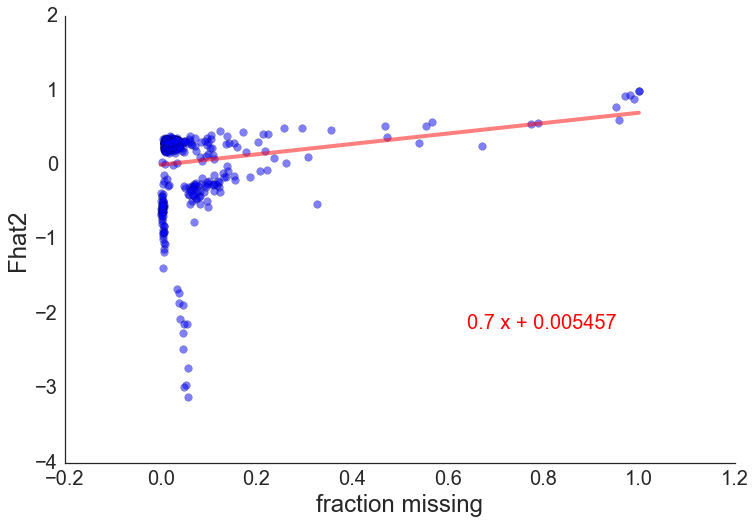

In [97]:
figsize(12, 8)
plt.scatter(x, y, s = 60, alpha = .5)
plt.plot(x.order(), fit(x.order()), 'r', lw = 4, alpha = .5)
plt.xlabel('fraction missing',fontsize = 24); plt.ylabel("Fhat2",fontsize = 24)
plt.annotate(fit,  xycoords='axes fraction', xy = (.6, .3), fontsize = 20, color = 'red')
sns.despine()
plt.show()

### F per population

In [138]:
het = pd.read_csv('batch_4_out.het', sep = " ", skipinitialspace = True)
#het['CLUSTER'] = [int(xx.split('_')[1]) for xx in het['FID']]
het.head()

,FID,IID,O(HOM),E(HOM),N(NM),F
0,1,PAMUR10_0001,54470,54350.0,61701,0.015680
1,1,PAMUR10_0002,54599,54650.0,62029,-0.006578
2,1,PAMUR10_0003,54559,54490.0,61843,0.008859
3,1,PAMUR10_0004,54585,54810.0,62210,-0.030800
4,1,PAMUR10_0005_comb,52448,52200.0,59224,0.035670


In [139]:
het = pd.merge(het, POPINFO, left_on = 'FID', right_on = 'CLUSTER')
het = het.sort(columns = 'Order_geo')
het.head()

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,FID,IID,O(HOM),E(HOM),N(NM),F,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT
245,9,PKUSHI07_0014,53563,53760.0,61030,-0.02717,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
232,9,PKUSHI07_0001_comb,54441,54700.0,62085,-0.03443,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
234,9,PKUSHI07_0003_comb,54217,54310.0,61650,-0.01263,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
235,9,PKUSHI07_0004,54005,53900.0,61155,0.01479,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
236,9,PKUSHI07_0005_comb,54321,54620.0,62026,-0.04106,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia


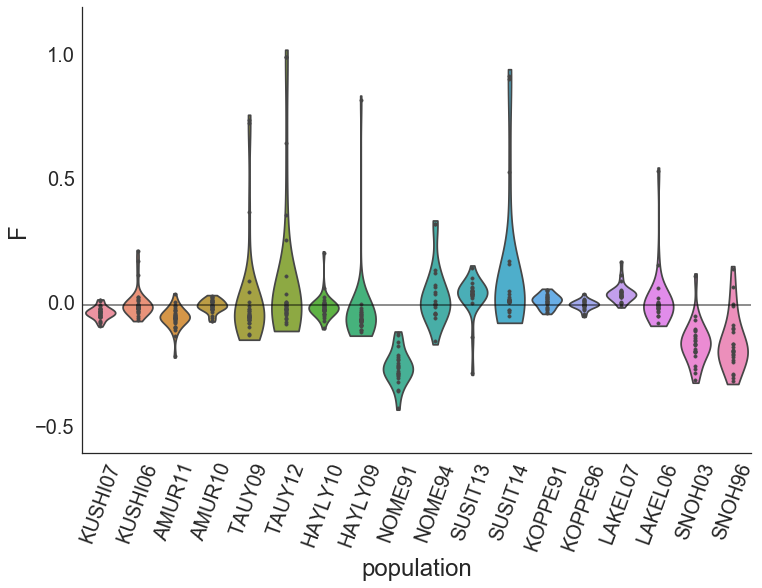

In [140]:
figsize(12, 8)
sns.violinplot(y = het['F'], x = het['POPNAME'], saturation = .8, width =.8, scale = "width",
               cut = .2, inner="points", inner_kws={"ms": 16})
plt.axhline(c='black', alpha = .5)
plt.xlabel('population',fontsize = 24); plt.ylabel("F",fontsize = 24)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

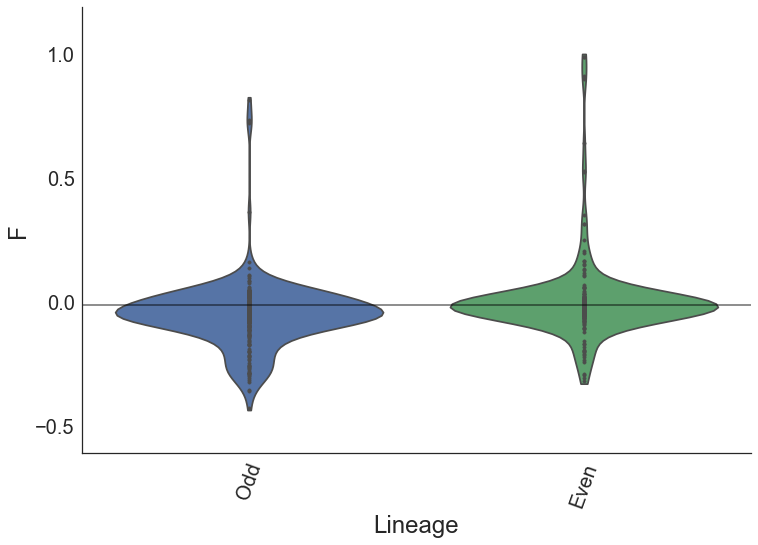

In [141]:
figsize(12, 8)
sns.violinplot(x = het['LINEAGE'], y = het['F'], saturation = .8, width =.8, scale = "width", cut =.2,
                inner="points", inner_kws={"ms": 16})
plt.axhline(c='black', alpha = .5)
plt.xlabel('Lineage',fontsize = 24); plt.ylabel("F",fontsize = 24)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

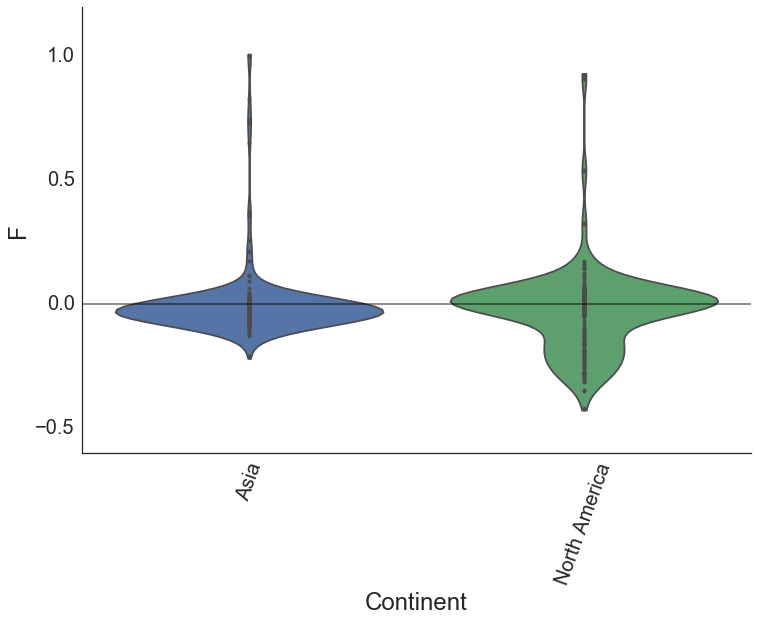

In [142]:
figsize(12, 8)
sns.violinplot(y = het['F'], x = het['CONTINENT'], saturation = .8, width =.8, scale = "width", cut =.2,
                inner="points", inner_kws={"ms": 16})
plt.axhline(c='black', alpha = .5)
plt.xlabel('Continent',fontsize = 24); plt.ylabel("F",fontsize = 24)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()